<a href="https://colab.research.google.com/github/XTMay/python-data-science-course/blob/main/notebooks/Lec_13_Visual_EDA_with_Real_Dataset_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ 亚马逊商品数据分析实战教程

## 📚 课程概述

欢迎来到数据科学实战课程！在这个 Notebook 中，我们将使用真实的亚马逊商品数据，学习数据科学的核心技能：

### 🎯 学习目标
通过本课程，您将学会：
- 📊 **数据清洗**：处理缺失值、重复值，数据类型转换
- 🔍 **探索性数据分析 (EDA)**：发现数据中的模式和趋势
- 📈 **数据可视化**：使用 matplotlib 和 seaborn 创建有洞察力的图表
- 📉 **统计分析**：相关性分析、假设检验等

### 📋 数据集介绍
我们使用的亚马逊商品数据包含以下关键字段：
- **product_id**: 商品ID
- **product_name**: 商品名称
- **category**: 商品类别
- **discounted_price**: 折扣价格
- **actual_price**: 原价
- **discount_percentage**: 折扣百分比
- **rating**: 商品评分
- **rating_count**: 评价数量
- **about_product**: 商品描述
- **user_id**: 用户ID

## 1. 📦 导入必需的库

首先导入我们需要的所有 Python 库：

In [ ]:
# 数据处理和数值计算
import pandas as pd
import numpy as np

# 统计分析
from scipy import stats
from scipy.stats import ttest_ind, pearsonr

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

print("✅ 所有库导入成功！")

✅ 所有库导入成功！


检测到操作系统: Darwin
系统中找到 464 个字体
成功设置字体: Hiragino Sans GB
当前字体设置: ['Hiragino Sans GB', 'DejaVu Sans']


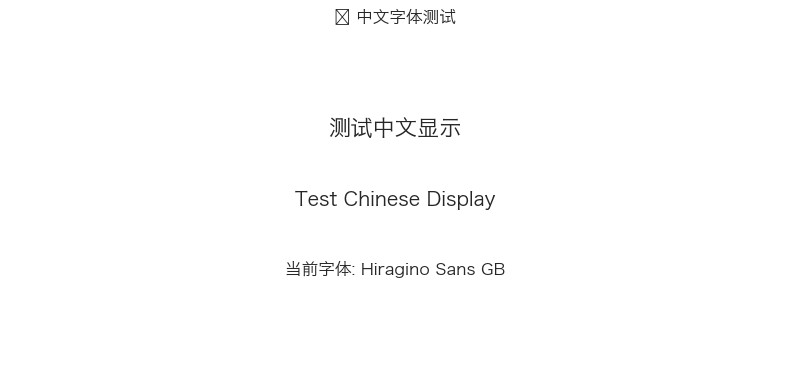

中文字体配置完成!


In [ ]:
# 数据可视化
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import platform

# 设置可视化样式
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")
sns.set_palette("husl")

def setup_chinese_font():
    """设置中文字体显示，适配不同操作系统"""
    system = platform.system()
    print(f"检测到操作系统: {system}")

    # 重建字体缓存（可选，首次运行时有用）
    try:
        fm._rebuild()
    except:
        pass

    if system == "Darwin":  # macOS
        # macOS 优先字体列表
        mac_fonts = [
            'PingFang SC',           # 苹方简体
            'Hiragino Sans GB',      # 冬青黑体简体中文
            'STHeiti',               # 华文黑体
            'Heiti SC',              # 黑体-简
            'Arial Unicode MS',      # Arial Unicode MS
            'SimHei'                 # 黑体（如果安装了）
        ]
        fonts_to_try = mac_fonts
    elif system == "Windows":
        fonts_to_try = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong']
    else:  # Linux
        fonts_to_try = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei', 'Noto Sans CJK SC', 'Droid Sans Fallback', 'DejaVu Sans']

    # 获取系统可用字体
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    print(f"系统中找到 {len(available_fonts)} 个字体")

    # 设置字体
    font_found = False
    for font_name in fonts_to_try:
        if font_name in available_fonts:
            plt.rcParams['font.sans-serif'] = [font_name] + ['DejaVu Sans']
            plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
            print(f"成功设置字体: {font_name}")
            font_found = True
            break

    if not font_found:
        # 备选方案：搜索包含中文关键词的字体
        chinese_fonts = [f for f in available_fonts if any(keyword in f.lower()
                        for keyword in ['pingfang', 'hiragino', 'stheiti', 'heiti', 'han', 'noto', 'wenquanyi', 'droid', 'cjk'])]
        if chinese_fonts:
            plt.rcParams['font.sans-serif'] = [chinese_fonts[0]] + ['DejaVu Sans']
            plt.rcParams['axes.unicode_minus'] = False
            print(f"使用备选中文字体: {chinese_fonts[0]}")
            font_found = True

    if not font_found:
        print("警告: 未找到合适的中文字体，中文可能显示为方块")
        # 安装字体的建议
        print("建议安装中文字体:")
        if system == "Linux":
            print("  Ubuntu/Debian: sudo apt-get install fonts-wqy-microhei fonts-noto-cjk")
            print("  CentOS/RHEL: sudo yum install wqy-microhei-fonts")
        # 即使没有中文字体也设置unicode_minus
        plt.rcParams['axes.unicode_minus'] = False

    # 显示当前字体设置
    print(f"当前字体设置: {plt.rcParams['font.sans-serif'][:2]}")

    # 测试中文字体显示
    test_chinese_display()

    return font_found

def test_chinese_display():
    """测试中文字体显示效果"""
    import matplotlib.pyplot as plt

    # 创建一个简单的测试图
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.text(0.5, 0.7, '测试中文显示', fontsize=16, ha='center', transform=ax.transAxes)
    ax.text(0.5, 0.5, 'Test Chinese Display', fontsize=14, ha='center', transform=ax.transAxes)
    ax.text(0.5, 0.3, f'当前字体: {plt.rcParams["font.sans-serif"][0]}', fontsize=12, ha='center', transform=ax.transAxes)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title('🔤 中文字体测试')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# 执行字体设置
setup_chinese_font()
print("中文字体配置完成!")

In [ ]:
# 如果没有中文字体，可以下载并使用字体文件
def download_and_use_chinese_font():
    """下载并使用中文字体（备用方案）"""
    import os
    import requests
    from pathlib import Path

    # 创建字体目录
    font_dir = Path.home() / '.fonts'
    font_dir.mkdir(exist_ok=True)

    font_file = font_dir / 'SourceHanSansCN-Regular.otf'

    if not font_file.exists():
        print("正在下载中文字体...")
        try:
            # 使用Google Fonts的开源中文字体
            url = "https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SimplifiedChinese/SourceHanSansCN-Regular.otf"
            response = requests.get(url, timeout=30)
            with open(font_file, 'wb') as f:
                f.write(response.content)
            print(f"字体下载完成: {font_file}")
        except Exception as e:
            print(f"字体下载失败: {e}")
            return False

    # 注册字体
    try:
        fm.fontManager.addfont(str(font_file))
        plt.rcParams['font.sans-serif'] = ['Source Han Sans CN'] + plt.rcParams['font.sans-serif']
        plt.rcParams['axes.unicode_minus'] = False
        print("成功加载下载的中文字体")
        return True
    except Exception as e:
        print(f"字体加载失败: {e}")
        return False

# 测试并提供字体安装建议
print("\n🔧 如果中文显示不正常，请执行以下命令安装中文字体:")
print("Linux (Ubuntu/Debian): sudo apt-get install fonts-wqy-microhei fonts-noto-cjk")
print("Linux (CentOS/RHEL): sudo yum install wqy-microhei-fonts google-noto-cjk-fonts")
print("macOS: 系统自带中文字体")
print("Windows: 系统自带中文字体")
print("\n或者运行以下代码自动下载字体:")
print("download_and_use_chinese_font()")


🔧 如果中文显示不正常，请执行以下命令安装中文字体:
Linux (Ubuntu/Debian): sudo apt-get install fonts-wqy-microhei fonts-noto-cjk
Linux (CentOS/RHEL): sudo yum install wqy-microhei-fonts google-noto-cjk-fonts
macOS: 系统自带中文字体
Windows: 系统自带中文字体

或者运行以下代码自动下载字体:
download_and_use_chinese_font()


## 2. 📂 数据加载与初步探索

让我们加载数据并查看基本信息：

In [ ]:
# 加载数据
df = pd.read_csv('/Users/xiaotingzhou/Documents/Lectures/python-data-science-course/data/amazon.csv')

print(f"📊 数据集基本信息：")
print(f"行数：{df.shape[0]:,}")
print(f"列数：{df.shape[1]:,}")
print(f"\n前5行数据：")
df.head()

📊 数据集基本信息：
行数：1,465
列数：16

前5行数据：


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# 查看数据类型和缺失值信息
print("📋 数据类型和缺失值统计：")
info_df = pd.DataFrame({
    '数据类型': df.dtypes,
    '缺失值数量': df.isnull().sum(),
    '缺失值百分比': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

📋 数据类型和缺失值统计：
                       数据类型  缺失值数量  缺失值百分比
product_id           object      0    0.00
product_name         object      0    0.00
category             object      0    0.00
discounted_price     object      0    0.00
actual_price         object      0    0.00
discount_percentage  object      0    0.00
rating               object      0    0.00
rating_count         object      2    0.14
about_product        object      0    0.00
user_id              object      0    0.00
user_name            object      0    0.00
review_id            object      0    0.00
review_title         object      0    0.00
review_content       object      0    0.00
img_link             object      0    0.00
product_link         object      0    0.00


## 3. 🧹 数据预处理

在进行分析之前，我们需要清洗和预处理数据：

In [ ]:
# 3.1 处理重复值
print(f"去重前数据行数: {len(df)}")
df_clean = df.drop_duplicates()
print(f"去重后数据行数: {len(df_clean)}")
print(f"删除了 {len(df) - len(df_clean)} 行重复数据")

去重前数据行数: 1465
去重后数据行数: 1465
删除了 0 行重复数据


In [ ]:
# 3.2 处理价格字段 - 去除₹符号并转换为数值型
def clean_price(price_str):
    """清洗价格字符串，转换为浮点数"""
    if pd.isna(price_str):
        return np.nan
    # 去除₹符号和逗号，转换为浮点数
    return float(str(price_str).replace('₹', '').replace(',', ''))

# 处理折扣价格和原价
df_clean['discounted_price_clean'] = df_clean['discounted_price'].apply(clean_price)
df_clean['actual_price_clean'] = df_clean['actual_price'].apply(clean_price)

print("✅ 价格字段清洗完成")
print(f"折扣价格样例: {df_clean['discounted_price_clean'].head().values}")

✅ 价格字段清洗完成
折扣价格样例: [399. 199. 199. 329. 154.]


In [ ]:
# 3.3 处理折扣百分比
def clean_discount(discount_str):
    """清洗折扣百分比字符串，转换为浮点数"""
    if pd.isna(discount_str):
        return np.nan
    return float(str(discount_str).replace('%', ''))

df_clean['discount_percentage_clean'] = df_clean['discount_percentage'].apply(clean_discount)
print("✅ 折扣百分比字段清洗完成")
print(f"折扣百分比样例: {df_clean['discount_percentage_clean'].head().values}")

✅ 折扣百分比字段清洗完成
折扣百分比样例: [64. 43. 90. 53. 61.]


In [ ]:
# 3.4 处理评分和评价数量
def clean_rating_count(count_str):
    """清洗评价数量字符串，转换为整数"""
    if pd.isna(count_str):
        return np.nan
    return int(str(count_str).replace(',', ''))

# 转换评分为数值型
df_clean['rating_clean'] = pd.to_numeric(df_clean['rating'], errors='coerce')
df_clean['rating_count_clean'] = df_clean['rating_count'].apply(clean_rating_count)

print("✅ 评分字段清洗完成")
print(f"评分样例: {df_clean['rating_clean'].head().values}")
print(f"评价数量样例: {df_clean['rating_count_clean'].head().values}")

✅ 评分字段清洗完成
评分样例: [4.2 4.  3.9 4.2 4.2]
评价数量样例: [24269. 43994.  7928. 94363. 16905.]


In [ ]:
# 3.5 处理缺失值
print("🔍 清洗后的缺失值情况：")
missing_summary = pd.DataFrame({
    '缺失值数量': df_clean[['discounted_price_clean', 'actual_price_clean',
                         'discount_percentage_clean', 'rating_clean', 'rating_count_clean']].isnull().sum(),
    '缺失值百分比': (df_clean[['discounted_price_clean', 'actual_price_clean',
                          'discount_percentage_clean', 'rating_clean', 'rating_count_clean']].isnull().sum() / len(df_clean) * 100).round(2)
})
print(missing_summary)

# 删除关键字段缺失的行
df_final = df_clean.dropna(subset=['discounted_price_clean', 'rating_clean'])
print(f"\n最终数据集行数: {len(df_final)}")

🔍 清洗后的缺失值情况：
                           缺失值数量  缺失值百分比
discounted_price_clean         0    0.00
actual_price_clean             0    0.00
discount_percentage_clean      0    0.00
rating_clean                   1    0.07
rating_count_clean             2    0.14

最终数据集行数: 1464


## 4. 📊 探索性数据分析 (EDA)

现在让我们深入探索数据，发现有趣的模式和趋势：

### 4.1 商品类别分析

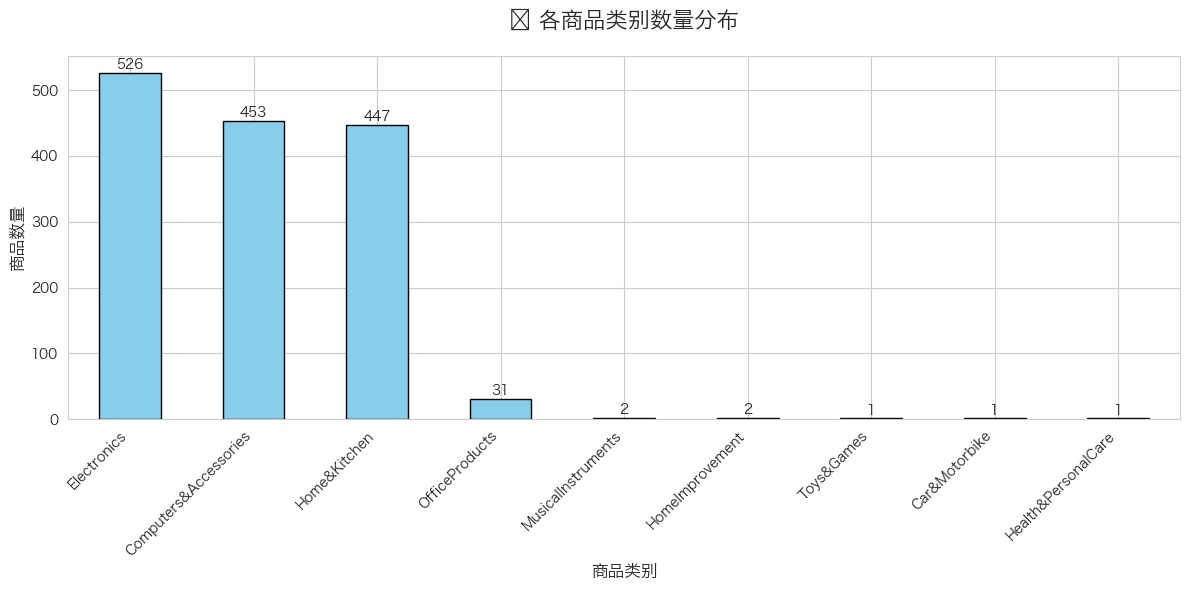

📊 总共有 9 个不同的商品类别


In [ ]:
# 提取主要类别（第一级分类）
df_final['main_category'] = df_final['category'].str.split('|').str[0]

# 统计各类别商品数量
category_counts = df_final['main_category'].value_counts().head(10)

# 创建条形图
plt.figure(figsize=(12, 6))
ax = category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('🏪 各商品类别数量分布', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('商品类别', fontsize=12)
plt.ylabel('商品数量', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 添加数值标签
for i, v in enumerate(category_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 总共有 {df_final['main_category'].nunique()} 个不同的商品类别")

### 4.2 价格分布分析

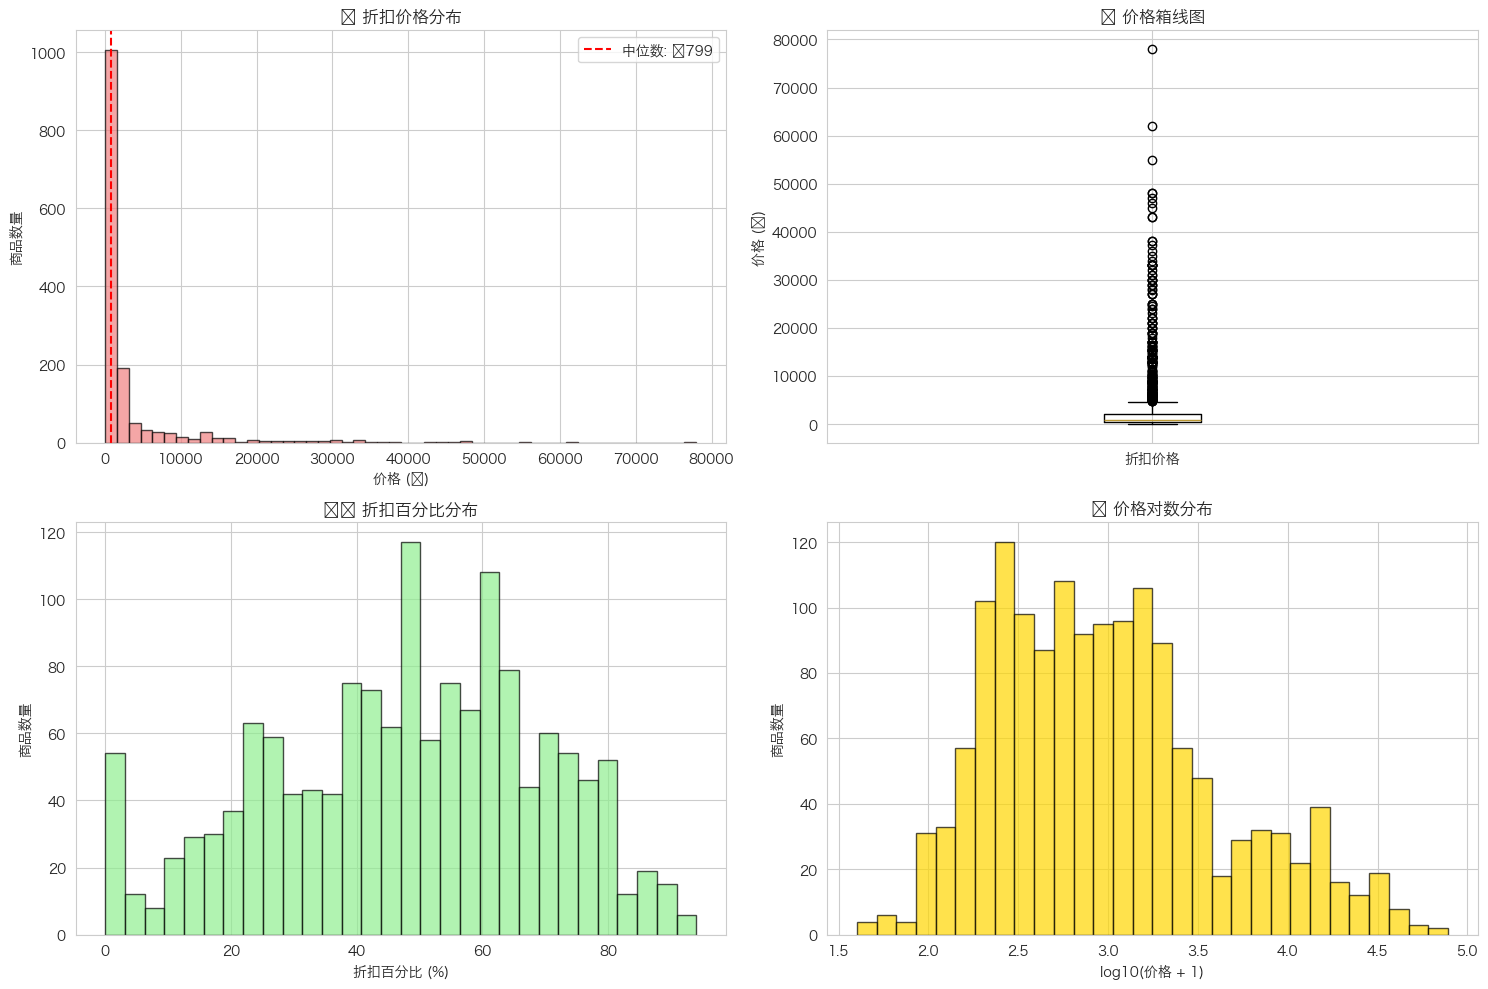

💰 价格统计信息：
平均折扣价格: ₹3126.01
中位数折扣价格: ₹799.00
价格标准差: ₹6946.63
最低价格: ₹39.00
最高价格: ₹77990.00


In [ ]:
# 价格分布可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 4.2.1 折扣价格直方图
axes[0, 0].hist(df_final['discounted_price_clean'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 0].set_title('💰 折扣价格分布', fontweight='bold')
axes[0, 0].set_xlabel('价格 (₹)')
axes[0, 0].set_ylabel('商品数量')
axes[0, 0].axvline(df_final['discounted_price_clean'].median(), color='red', linestyle='--', label=f'中位数: ₹{df_final["discounted_price_clean"].median():.0f}')
axes[0, 0].legend()

# 4.2.2 价格箱线图
axes[0, 1].boxplot([df_final['discounted_price_clean']], labels=['折扣价格'])
axes[0, 1].set_title('📦 价格箱线图', fontweight='bold')
axes[0, 1].set_ylabel('价格 (₹)')

# 4.2.3 折扣百分比分布
axes[1, 0].hist(df_final['discount_percentage_clean'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('🏷️ 折扣百分比分布', fontweight='bold')
axes[1, 0].set_xlabel('折扣百分比 (%)')
axes[1, 0].set_ylabel('商品数量')

# 4.2.4 价格对数分布（处理偏斜）
log_prices = np.log10(df_final['discounted_price_clean'] + 1)
axes[1, 1].hist(log_prices, bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('📊 价格对数分布', fontweight='bold')
axes[1, 1].set_xlabel('log10(价格 + 1)')
axes[1, 1].set_ylabel('商品数量')

plt.tight_layout()
plt.show()

# 打印价格统计信息
print("💰 价格统计信息：")
print(f"平均折扣价格: ₹{df_final['discounted_price_clean'].mean():.2f}")
print(f"中位数折扣价格: ₹{df_final['discounted_price_clean'].median():.2f}")
print(f"价格标准差: ₹{df_final['discounted_price_clean'].std():.2f}")
print(f"最低价格: ₹{df_final['discounted_price_clean'].min():.2f}")
print(f"最高价格: ₹{df_final['discounted_price_clean'].max():.2f}")

### 4.3 评分分析

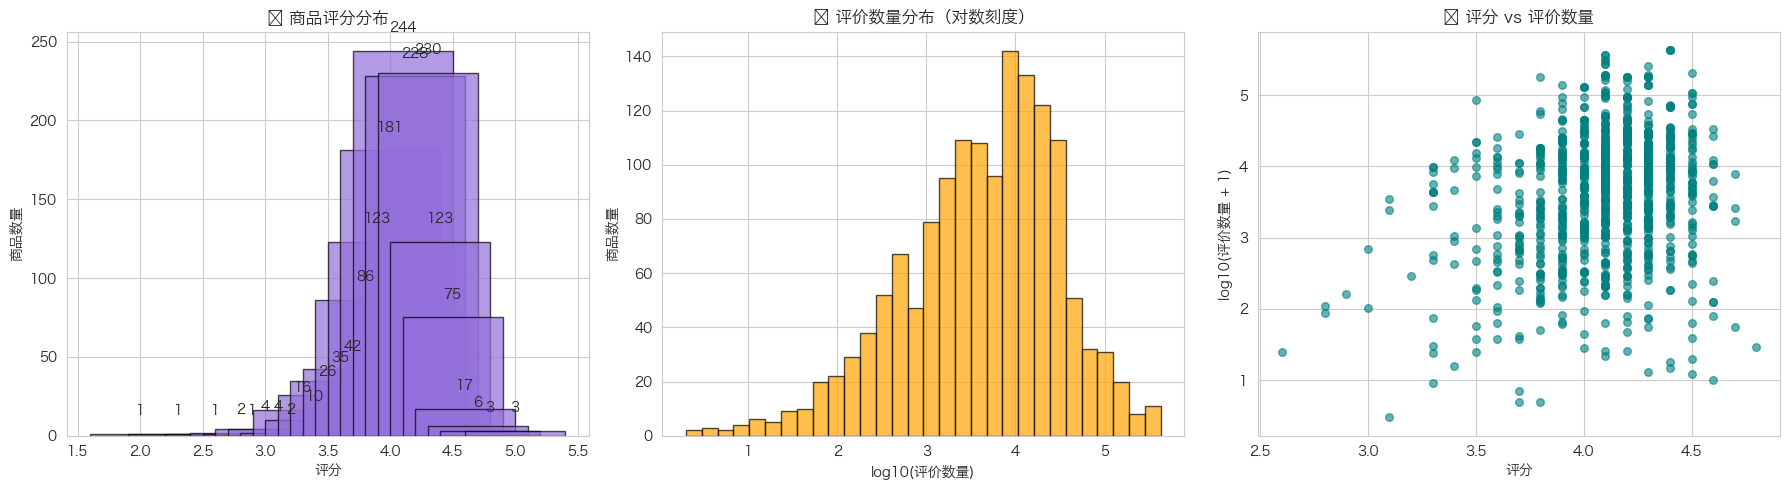

⭐ 评分统计信息：
平均评分: 4.10
中位数评分: 4.10
评分标准差: 0.292

评价数量统计（非零值）:
平均评价数量: 18307
中位数评价数量: 5179


In [ ]:
# 评分分布可视化
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 4.3.1 评分分布
rating_counts = df_final['rating_clean'].value_counts().sort_index()
axes[0].bar(rating_counts.index, rating_counts.values, color='mediumpurple', alpha=0.7, edgecolor='black')
axes[0].set_title('⭐ 商品评分分布', fontweight='bold')
axes[0].set_xlabel('评分')
axes[0].set_ylabel('商品数量')
for i, v in enumerate(rating_counts.values):
    axes[0].text(rating_counts.index[i], v + 10, str(v), ha='center', va='bottom')

# 4.3.2 评价数量分布（对数刻度）
valid_ratings = df_final['rating_count_clean'].dropna()
valid_ratings = valid_ratings[valid_ratings > 0]
axes[1].hist(np.log10(valid_ratings), bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_title('📝 评价数量分布（对数刻度）', fontweight='bold')
axes[1].set_xlabel('log10(评价数量)')
axes[1].set_ylabel('商品数量')

# 4.3.3 评分vs评价数量散点图
sample_data = df_final.dropna(subset=['rating_clean', 'rating_count_clean']).sample(min(1000, len(df_final)))
axes[2].scatter(sample_data['rating_clean'], np.log10(sample_data['rating_count_clean'] + 1),
               alpha=0.6, color='teal', s=30)
axes[2].set_title('⭐ 评分 vs 评价数量', fontweight='bold')
axes[2].set_xlabel('评分')
axes[2].set_ylabel('log10(评价数量 + 1)')

plt.tight_layout()
plt.show()

print("⭐ 评分统计信息：")
print(f"平均评分: {df_final['rating_clean'].mean():.2f}")
print(f"中位数评分: {df_final['rating_clean'].median():.2f}")
print(f"评分标准差: {df_final['rating_clean'].std():.3f}")
print(f"\n评价数量统计（非零值）:")
valid_rating_counts = df_final['rating_count_clean'].dropna()
valid_rating_counts = valid_rating_counts[valid_rating_counts > 0]
print(f"平均评价数量: {valid_rating_counts.mean():.0f}")
print(f"中位数评价数量: {valid_rating_counts.median():.0f}")

### 4.4 折扣与销量关系分析

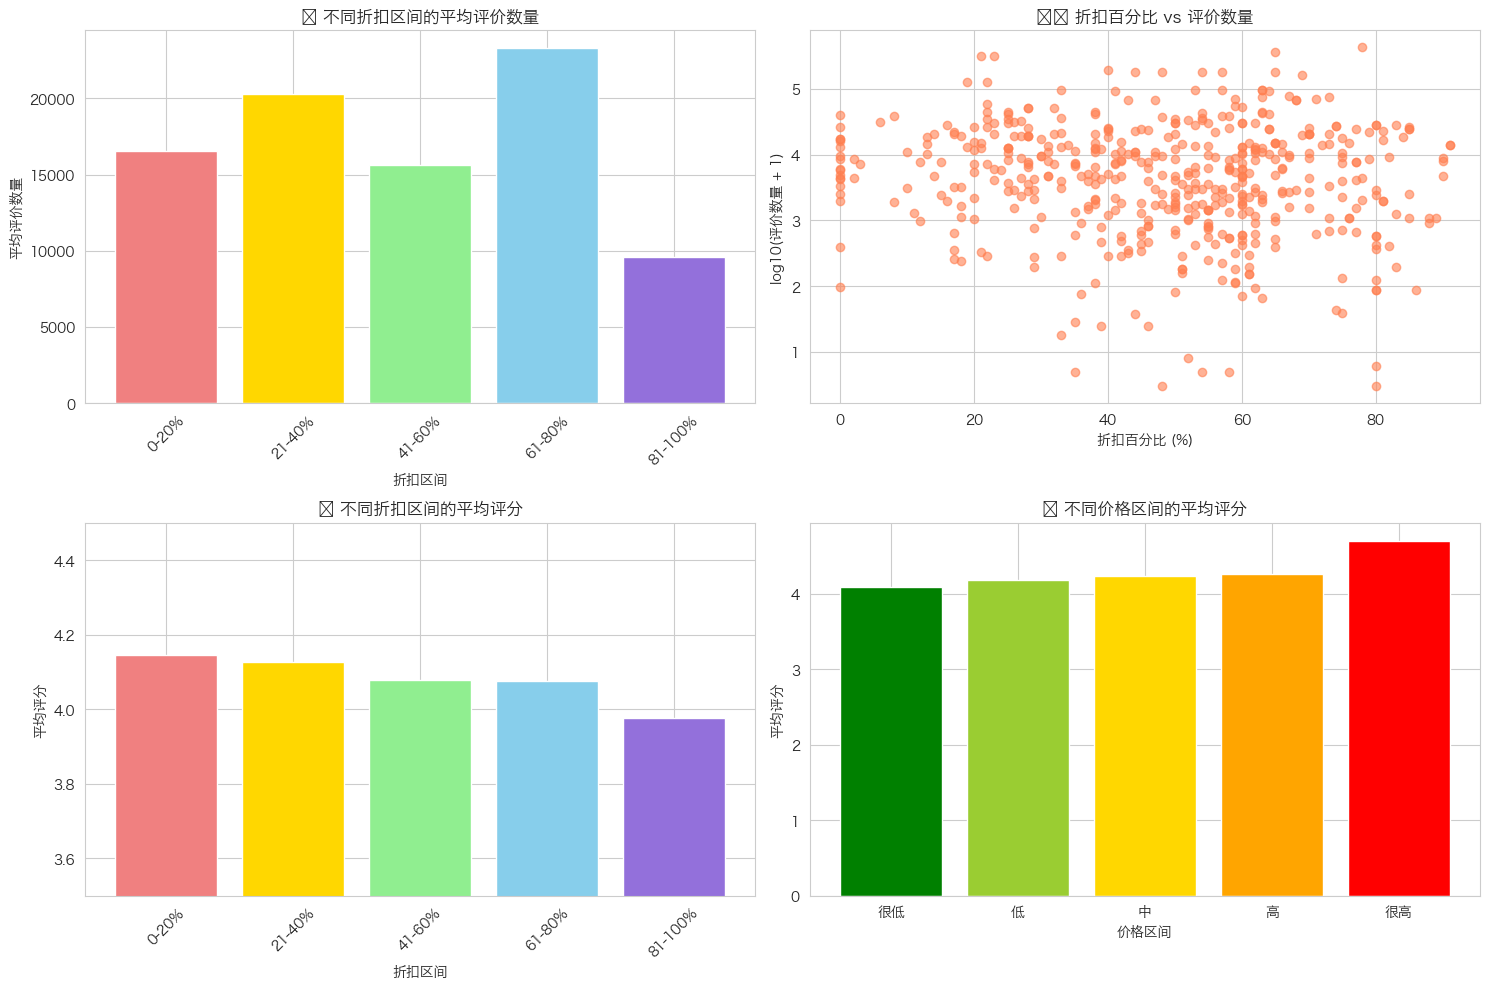

📊 折扣与销量分析总结：
discount_range
0-20%      16525.0
21-40%     20266.0
41-60%     15644.0
61-80%     23295.0
81-100%     9588.0

⭐ 折扣与评分分析总结：
discount_range
0-20%      4.15
21-40%     4.13
41-60%     4.08
61-80%     4.08
81-100%    3.98


In [ ]:
# 创建折扣区间分析
df_analysis = df_final.dropna(subset=['discount_percentage_clean', 'rating_count_clean'])

# 将折扣分为不同区间
df_analysis['discount_range'] = pd.cut(df_analysis['discount_percentage_clean'],
                                     bins=[0, 20, 40, 60, 80, 100],
                                     labels=['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])

# 可视化折扣与销量的关系
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 4.4.1 折扣区间与平均评价数量
discount_sales = df_analysis.groupby('discount_range')['rating_count_clean'].mean()
axes[0, 0].bar(range(len(discount_sales)), discount_sales.values,
              color=['lightcoral', 'gold', 'lightgreen', 'skyblue', 'mediumpurple'])
axes[0, 0].set_title('📊 不同折扣区间的平均评价数量', fontweight='bold')
axes[0, 0].set_xlabel('折扣区间')
axes[0, 0].set_ylabel('平均评价数量')
axes[0, 0].set_xticks(range(len(discount_sales)))
axes[0, 0].set_xticklabels(discount_sales.index, rotation=45)

# 4.4.2 散点图：折扣百分比 vs 评价数量
sample_data = df_analysis.sample(min(500, len(df_analysis)))
axes[0, 1].scatter(sample_data['discount_percentage_clean'],
                  np.log10(sample_data['rating_count_clean'] + 1), alpha=0.6, color='coral')
axes[0, 1].set_title('🏷️ 折扣百分比 vs 评价数量', fontweight='bold')
axes[0, 1].set_xlabel('折扣百分比 (%)')
axes[0, 1].set_ylabel('log10(评价数量 + 1)')

# 4.4.3 折扣区间与平均评分
discount_rating = df_analysis.groupby('discount_range')['rating_clean'].mean()
axes[1, 0].bar(range(len(discount_rating)), discount_rating.values,
              color=['lightcoral', 'gold', 'lightgreen', 'skyblue', 'mediumpurple'])
axes[1, 0].set_title('⭐ 不同折扣区间的平均评分', fontweight='bold')
axes[1, 0].set_xlabel('折扣区间')
axes[1, 0].set_ylabel('平均评分')
axes[1, 0].set_xticks(range(len(discount_rating)))
axes[1, 0].set_xticklabels(discount_rating.index, rotation=45)
axes[1, 0].set_ylim(3.5, 4.5)

# 4.4.4 价格区间分析
df_analysis['price_range'] = pd.cut(df_analysis['discounted_price_clean'],
                                   bins=5, labels=['很低', '低', '中', '高', '很高'])
price_rating = df_analysis.groupby('price_range')['rating_clean'].mean()
axes[1, 1].bar(range(len(price_rating)), price_rating.values,
              color=['green', 'yellowgreen', 'gold', 'orange', 'red'])
axes[1, 1].set_title('💰 不同价格区间的平均评分', fontweight='bold')
axes[1, 1].set_xlabel('价格区间')
axes[1, 1].set_ylabel('平均评分')
axes[1, 1].set_xticks(range(len(price_rating)))
axes[1, 1].set_xticklabels(price_rating.index)

plt.tight_layout()
plt.show()

print("📊 折扣与销量分析总结：")
print(discount_sales.round(0).to_string())
print("\n⭐ 折扣与评分分析总结：")
print(discount_rating.round(2).to_string())

### 4.5 相关性分析热力图

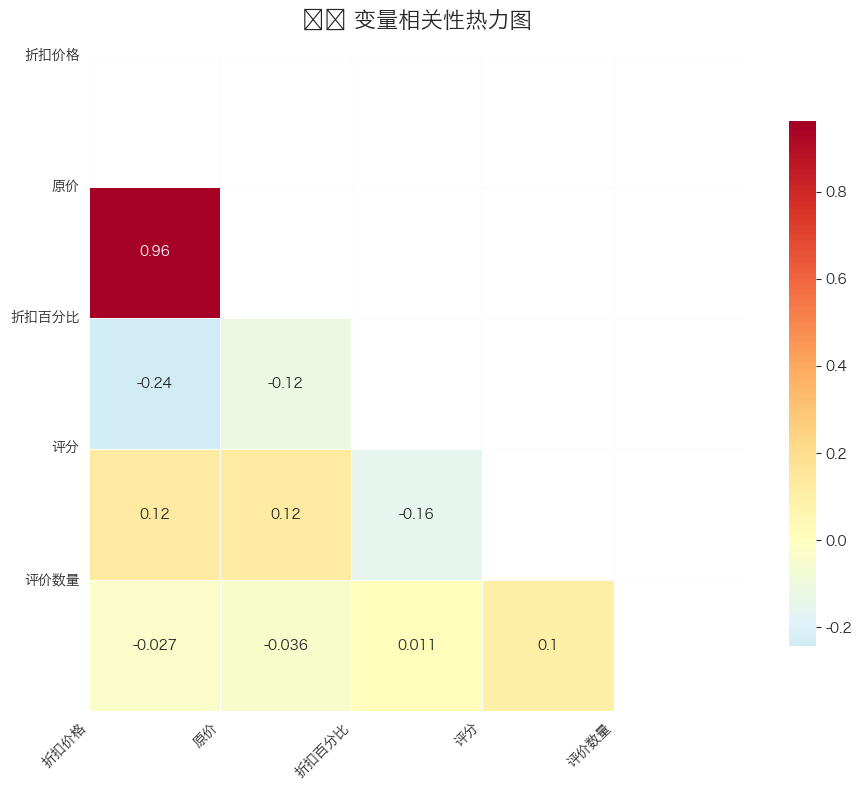

🔗 主要相关性发现：
折扣价格 vs 原价: 0.962
评分 vs 评价数量: 0.102
折扣百分比 vs 评分: -0.155


In [ ]:
# 选择数值型变量进行相关性分析
numeric_cols = ['discounted_price_clean', 'actual_price_clean', 'discount_percentage_clean',
               'rating_clean', 'rating_count_clean']

# 计算相关性矩阵
corr_matrix = df_final[numeric_cols].corr()

# 创建热力图
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # 只显示下三角
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('🌡️ 变量相关性热力图', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
# 设置更友好的标签
labels = ['折扣价格', '原价', '折扣百分比', '评分', '评价数量']
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.yticks(range(len(labels)), labels, rotation=0)
plt.tight_layout()
plt.show()

print("🔗 主要相关性发现：")
print(f"折扣价格 vs 原价: {corr_matrix.loc['discounted_price_clean', 'actual_price_clean']:.3f}")
print(f"评分 vs 评价数量: {corr_matrix.loc['rating_clean', 'rating_count_clean']:.3f}")
print(f"折扣百分比 vs 评分: {corr_matrix.loc['discount_percentage_clean', 'rating_clean']:.3f}")

## 5. 📈 高级统计分析

现在让我们进行一些高级的统计分析：

### 5.1 相关性显著性检验

In [ ]:
# 计算相关性及其显著性
def correlation_significance_test(x, y, variable_names):
    """计算相关系数和显著性"""
    # 删除缺失值
    mask = ~(np.isnan(x) | np.isnan(y))
    x_clean = x[mask]
    y_clean = y[mask]

    if len(x_clean) < 3:
        return None, None

    # 计算皮尔逊相关系数
    corr_coef, p_value = pearsonr(x_clean, y_clean)

    print(f"\n📊 {variable_names[0]} vs {variable_names[1]}")
    print(f"相关系数: {corr_coef:.4f}")
    print(f"p值: {p_value:.6f}")
    print(f"样本大小: {len(x_clean)}")

    if p_value < 0.001:
        significance = "高度显著 (p < 0.001)"
    elif p_value < 0.01:
        significance = "非常显著 (p < 0.01)"
    elif p_value < 0.05:
        significance = "显著 (p < 0.05)"
    else:
        significance = "不显著 (p ≥ 0.05)"

    print(f"显著性: {significance}")

    return corr_coef, p_value

print("🔍 相关性显著性检验结果：")

# 测试几个关键的相关性
correlation_significance_test(
    df_final['discount_percentage_clean'].values,
    df_final['rating_clean'].values,
    ['折扣百分比', '商品评分']
)

correlation_significance_test(
    df_final['discounted_price_clean'].values,
    df_final['rating_clean'].values,
    ['折扣价格', '商品评分']
)

correlation_significance_test(
    np.log10(df_final['rating_count_clean'].fillna(1).values),
    df_final['rating_clean'].values,
    ['评价数量(log)', '商品评分']
)

🔍 相关性显著性检验结果：

📊 折扣百分比 vs 商品评分
相关系数: -0.1554
p值: 0.000000
样本大小: 1464
显著性: 高度显著 (p < 0.001)

📊 折扣价格 vs 商品评分
相关系数: 0.1203
p值: 0.000004
样本大小: 1464
显著性: 高度显著 (p < 0.001)

📊 评价数量(log) vs 商品评分
相关系数: 0.2339
p值: 0.000000
样本大小: 1464
显著性: 高度显著 (p < 0.001)


(0.23387345787748948, 1.2244012883580674e-19)

### 5.2 假设检验：高折扣商品vs低折扣商品的评分差异

🔍 假设检验：高折扣商品 vs 低折扣商品的平均评分

样本统计：
高折扣商品数量: 695
低折扣商品数量: 769
高折扣商品平均评分: 4.063
低折扣商品平均评分: 4.127
评分差异: -0.064

📊 独立样本t检验结果：
t统计量: -4.1961
p值: 0.000029

🎯 结论 (α = 0.05):
拒绝原假设
高折扣商品与低折扣商品的平均评分有显著差异


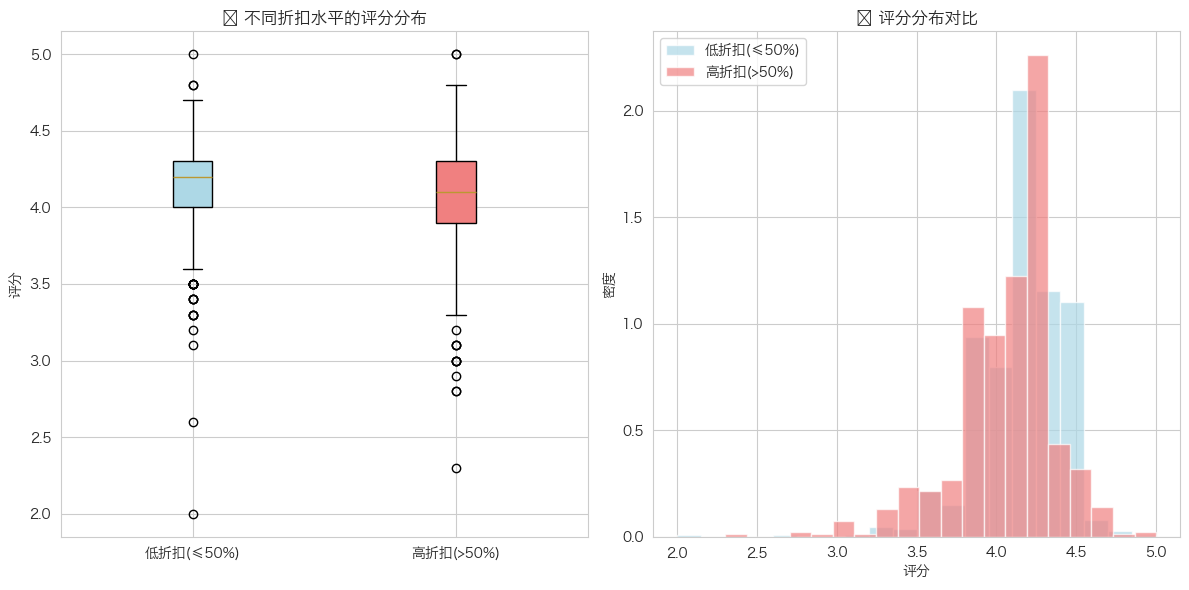

In [ ]:
# 将商品分为高折扣和低折扣两组
df_test = df_final.dropna(subset=['discount_percentage_clean', 'rating_clean'])

# 定义高折扣（>50%）和低折扣（≤50%）
high_discount = df_test[df_test['discount_percentage_clean'] > 50]['rating_clean']
low_discount = df_test[df_test['discount_percentage_clean'] <= 50]['rating_clean']

print(f"🔍 假设检验：高折扣商品 vs 低折扣商品的平均评分")
print(f"\n样本统计：")
print(f"高折扣商品数量: {len(high_discount)}")
print(f"低折扣商品数量: {len(low_discount)}")
print(f"高折扣商品平均评分: {high_discount.mean():.3f}")
print(f"低折扣商品平均评分: {low_discount.mean():.3f}")
print(f"评分差异: {high_discount.mean() - low_discount.mean():.3f}")

# 进行独立样本t检验
t_stat, p_value = ttest_ind(high_discount, low_discount, equal_var=False)

print(f"\n📊 独立样本t检验结果：")
print(f"t统计量: {t_stat:.4f}")
print(f"p值: {p_value:.6f}")

# 解释结果
alpha = 0.05
if p_value < alpha:
    conclusion = "拒绝原假设"
    interpretation = "高折扣商品与低折扣商品的平均评分有显著差异"
else:
    conclusion = "不能拒绝原假设"
    interpretation = "高折扣商品与低折扣商品的平均评分无显著差异"

print(f"\n🎯 结论 (α = {alpha}):")
print(f"{conclusion}")
print(f"{interpretation}")

# 可视化两组的分布
plt.figure(figsize=(12, 6))

# 子图1：箱线图比较
plt.subplot(1, 2, 1)
data_to_plot = [low_discount, high_discount]
box = plt.boxplot(data_to_plot, labels=['低折扣(≤50%)', '高折扣(>50%)'], patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
box['boxes'][1].set_facecolor('lightcoral')
plt.title('📦 不同折扣水平的评分分布', fontweight='bold')
plt.ylabel('评分')

# 子图2：直方图比较
plt.subplot(1, 2, 2)
plt.hist(low_discount, alpha=0.7, label='低折扣(≤50%)', color='lightblue', bins=20, density=True)
plt.hist(high_discount, alpha=0.7, label='高折扣(>50%)', color='lightcoral', bins=20, density=True)
plt.title('📊 评分分布对比', fontweight='bold')
plt.xlabel('评分')
plt.ylabel('密度')
plt.legend()

plt.tight_layout()
plt.show()

### 5.3 分布拟合分析

📊 评分分布的正态性检验：

Shapiro-Wilk检验:
统计量: 0.9251
p值: 0.000000

D'Agostino正态性检验:
统计量: 390.4776
p值: 0.000000


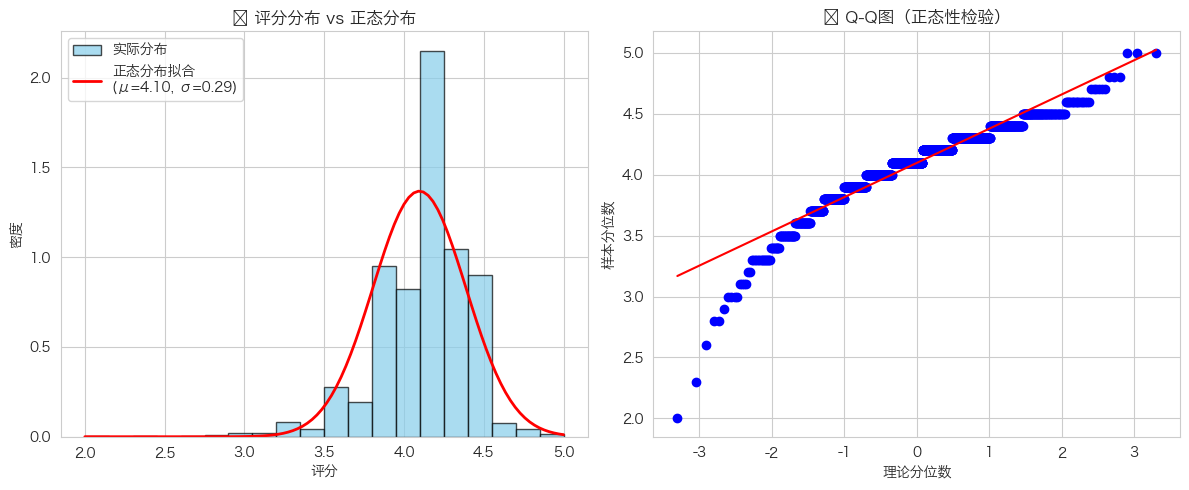


📊 分布特征：
偏度 (Skewness): -1.242
峰度 (Kurtosis): 4.341
均值: 4.097
标准差: 0.292


In [ ]:
# 对评分分布进行正态性检验
from scipy.stats import shapiro, normaltest

# 获取评分数据
ratings = df_final['rating_clean'].dropna()

print("📊 评分分布的正态性检验：")

# Shapiro-Wilk检验（适用于小样本）
if len(ratings) <= 5000:
    sw_stat, sw_p = shapiro(ratings.sample(min(5000, len(ratings))))
    print(f"\nShapiro-Wilk检验:")
    print(f"统计量: {sw_stat:.4f}")
    print(f"p值: {sw_p:.6f}")

# D'Agostino检验（适用于大样本）
da_stat, da_p = normaltest(ratings)
print(f"\nD'Agostino正态性检验:")
print(f"统计量: {da_stat:.4f}")
print(f"p值: {da_p:.6f}")

# 可视化评分分布与正态分布的对比
plt.figure(figsize=(12, 5))

# 子图1：直方图与正态分布曲线
plt.subplot(1, 2, 1)
plt.hist(ratings, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='实际分布')

# 拟合正态分布
mu, sigma = ratings.mean(), ratings.std()
x = np.linspace(ratings.min(), ratings.max(), 100)
normal_curve = stats.norm.pdf(x, mu, sigma)
plt.plot(x, normal_curve, 'r-', linewidth=2, label=f'正态分布拟合\n(μ={mu:.2f}, σ={sigma:.2f})')

plt.title('⭐ 评分分布 vs 正态分布', fontweight='bold')
plt.xlabel('评分')
plt.ylabel('密度')
plt.legend()

# 子图2：Q-Q图
plt.subplot(1, 2, 2)
stats.probplot(ratings, dist="norm", plot=plt)
plt.title('📊 Q-Q图（正态性检验）', fontweight='bold')
plt.xlabel('理论分位数')
plt.ylabel('样本分位数')

plt.tight_layout()
plt.show()

# 计算偏度和峰度
from scipy.stats import skew, kurtosis
print(f"\n📊 分布特征：")
print(f"偏度 (Skewness): {skew(ratings):.3f}")
print(f"峰度 (Kurtosis): {kurtosis(ratings):.3f}")
print(f"均值: {ratings.mean():.3f}")
print(f"标准差: {ratings.std():.3f}")

## 6. 🎯 商业洞察总结

基于我们的数据分析，让我们总结主要发现和商业建议：